In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### As Employee Count, Over18 and StandardHours is same for all the employees thus dropping the columns

In [29]:
df1=df.drop("EmployeeCount",axis=1)
df2=df1.drop("Over18",axis=1)
at=df2.drop("StandardHours",axis=1)

In [30]:
at.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance             

In [31]:
at.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### For modelling we need to encode the object data types

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [33]:
for i in at.columns:
    if at[i].dtypes=="object":
        at[i]=enc.fit_transform(at[i].values.reshape(-1,1))

In [34]:
at

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [35]:
at.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [36]:
at.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

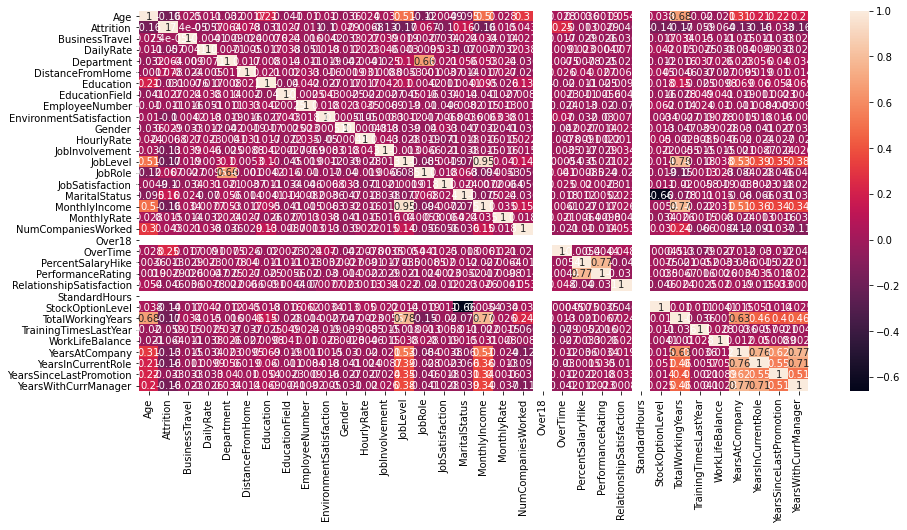

In [37]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True)

In [38]:
corr_matrix=at.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

### Through Correlation, we see that the major factors contribution to Attrition of employees are Over time, Marital status, their distance from home, job role and so on.

### Now to seperate dependent and independent variables, x and y,

In [39]:
x=at.drop("Attrition",axis=1)
y=at["Attrition"]

In [40]:
x.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
G

### We see that the data is skewed and to bring the skewness in the range of (-0.5,0.5) using power transform


In [41]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [42]:
type(x_new)

numpy.ndarray

In [43]:
x=pd.DataFrame(x_new,columns=x.columns)

In [44]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-2.164110,-0.706596,-1.224745,...,-0.423557,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,-2.154174,0.208597,0.816497,...,2.348814,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,-2.136953,1.209516,0.816497,...,-0.423557,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,-2.129176,1.209516,-1.224745,...,-0.423557,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-2.114724,-1.518118,0.816497,...,-0.423557,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,1.536992,0.208597,0.816497,...,-0.423557,0.225164,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.316210,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,1.538245,1.209516,0.816497,...,-0.423557,-1.529513,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-1.123755,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,1.540748,-0.706596,0.816497,...,2.348814,-0.700130,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,1.276411,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,1.542000,1.209516,0.816497,...,-0.423557,1.229016,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [45]:
x.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
JobLevel                    0.103624
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
MonthlyIncome               0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
E

In [46]:
sk=x.skew()

In [47]:
sk[np.abs(sk)>0.25].all()

True

### Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

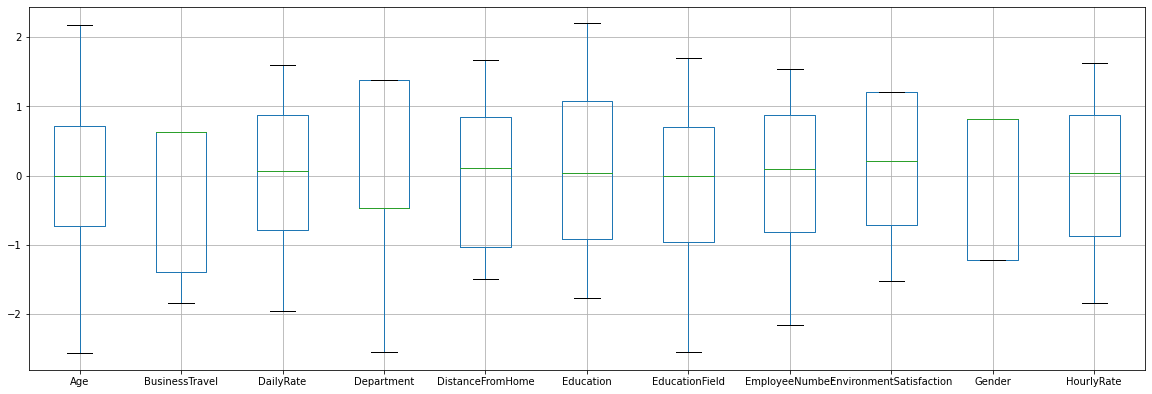

In [48]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### As we see there are no outliers, thus can proceed with modelling

In [50]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-2.164110,-0.706596,-1.224745,...,-0.423557,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,-2.154174,0.208597,0.816497,...,2.348814,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,-2.136953,1.209516,0.816497,...,-0.423557,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,-2.129176,1.209516,-1.224745,...,-0.423557,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-2.114724,-1.518118,0.816497,...,-0.423557,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,1.536992,0.208597,0.816497,...,-0.423557,0.225164,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.316210,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,1.538245,1.209516,0.816497,...,-0.423557,-1.529513,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-1.123755,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,1.540748,-0.706596,0.816497,...,2.348814,-0.700130,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,1.276411,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,1.542000,1.209516,0.816497,...,-0.423557,1.229016,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [51]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

### To predict the employee Attrition we need to do Logistric regression modelling as the value of Attrition is 0 or 1 thus binary mapping

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [53]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.9217687074829932 on Random state 821


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=821)

In [55]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
218,0.912074,-1.846466,0.648255,1.377454,-0.050827,0.040522,0.697390,-1.204842,1.209516,-1.224745,...,-0.423557,1.229016,-1.087933,1.388755,-0.578785,0.276821,1.633304,0.883888,1.730033,1.090110
589,-0.853982,0.635468,0.077919,-0.472127,-1.494085,-0.916940,-0.960488,-0.228270,-0.706596,-1.224745,...,-0.423557,1.229016,0.548969,-1.988249,-1.481770,0.276821,-1.440442,-1.596434,-1.094862,-1.550156
128,-1.870768,0.635468,-0.446175,-0.472127,-1.031215,-1.771185,1.703306,-1.531150,0.208597,0.816497,...,-0.423557,0.225164,0.548969,-1.279754,-0.578785,0.276821,-0.951540,-0.908168,0.607464,-0.865082
951,0.522140,-1.846466,-1.407611,1.377454,0.479509,-0.916940,0.697390,0.560324,0.208597,0.816497,...,-0.423557,-1.529513,-1.087933,1.048395,0.942515,0.276821,1.633304,-0.446645,1.689587,1.256030
161,-1.123755,-1.846466,-0.200155,-0.472127,0.367247,0.040522,0.697390,-1.404028,1.209516,0.816497,...,-0.423557,1.229016,0.548969,-0.592063,-1.481770,-2.144446,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0.316210,-1.392865,-0.015999,1.377454,1.247250,0.040522,-0.960488,1.219037,0.208597,0.816497,...,-0.423557,1.229016,0.548969,-0.410500,2.248381,0.276821,-0.951540,-0.908168,0.607464,-0.406881
1452,1.363928,-1.392865,0.250644,1.377454,-1.494085,1.082871,-0.960488,1.515676,-0.706596,0.816497,...,-0.423557,1.229016,1.313755,0.313335,0.217384,0.276821,0.139692,-0.089615,-1.094862,-0.865082
176,-0.353971,0.635468,-1.829761,-0.472127,-1.031215,0.040522,-0.960488,-1.345030,0.208597,0.816497,...,-0.423557,-1.529513,-1.087933,-1.019068,-0.578785,1.998177,-0.591845,-0.908168,-1.094862,-0.406881
803,-0.236188,-1.846466,-0.185240,-0.472127,-0.700347,1.082871,-0.960488,0.245381,0.208597,0.816497,...,-0.423557,1.229016,1.785018,-0.592063,-0.578785,0.276821,-2.229592,-1.596434,-1.094862,-1.550156


In [56]:
y_train

218     0.0
589     1.0
128     0.0
951     0.0
161     0.0
       ... 
1292    0.0
1452    1.0
176     0.0
803     0.0
239     1.0
Name: Attrition, Length: 1176, dtype: float64

In [57]:
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
580,-0.121000,0.635468,-1.018700,1.377454,0.243416,1.082871,-0.960488,-0.246629,-1.518118,-1.224745,...,-0.423557,-0.700130,0.548969,-1.279754,-1.481770,-1.108624,-0.591845,-0.446645,-1.094862,-0.406881
512,-1.123755,0.635468,0.787945,-0.472127,-0.700347,1.082871,0.697390,-0.425986,-1.518118,0.816497,...,-0.423557,1.229016,-1.087933,-0.792958,-2.579073,0.276821,-0.305280,-0.446645,0.096854,-0.865082
411,2.172817,0.635468,-0.910092,-0.472127,0.105316,0.040522,-0.960488,-0.699323,-1.518118,-1.224745,...,-0.423557,1.229016,-1.087933,2.092144,1.615639,-2.144446,2.255606,1.066744,1.689587,1.409863
543,0.817147,-1.846466,-1.027389,-0.472127,1.456094,0.040522,0.697390,-0.349885,-1.518118,0.816497,...,-0.423557,0.225164,-1.087933,-0.090665,1.615639,0.276821,-0.066114,-0.446645,0.096854,0.239219
76,-0.121000,0.635468,0.008197,1.377454,-1.494085,1.082871,-0.000004,-1.731920,0.208597,0.816497,...,-0.423557,-0.700130,-1.087933,0.760056,-0.578785,0.276821,1.301939,1.802751,0.607464,1.090110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,1.097202,0.635468,-0.170358,1.377454,0.846424,1.082871,-0.000004,-0.377394,1.209516,0.816497,...,-0.423557,1.229016,-1.087933,1.137690,-0.578785,0.276821,0.320677,0.883888,0.096854,0.909635
906,-0.236188,0.635468,1.229229,-0.472127,1.247250,0.040522,1.703306,0.467891,0.208597,-1.224745,...,-0.423557,1.229016,-1.087933,-1.591480,1.615639,-1.108624,-1.440442,-1.596434,-1.094862,-1.550156
1395,-0.597882,-1.392865,-0.045141,1.377454,1.548529,1.082871,-0.000004,1.418431,-1.518118,0.816497,...,-0.423557,0.225164,-1.087933,0.052495,0.942515,0.276821,0.762660,0.883888,-1.094862,1.090110
1224,-1.264315,0.635468,-1.001375,-0.472127,1.063256,1.082871,0.697390,1.095558,1.209516,0.816497,...,-0.423557,0.225164,1.785018,-1.279754,0.217384,1.998177,-0.591845,-0.446645,-1.094862,-0.406881


In [58]:
y_test

580     0.0
512     0.0
411     0.0
543     0.0
76      0.0
       ... 
532     0.0
906     0.0
1395    1.0
1224    0.0
1002    0.0
Name: Attrition, Length: 294, dtype: float64

In [59]:
x_train.shape

(1176, 31)

In [60]:
y_train.shape

(1176,)

In [61]:
x_test.shape

(294, 31)

In [62]:
y_test.shape

(294,)

### Once we have splitted the data into train and test data we can check the accuracy using various classifiers

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 92.17687074829932
[[253   3]
 [ 20  18]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       256
         1.0       0.86      0.47      0.61        38

    accuracy                           0.92       294
   macro avg       0.89      0.73      0.78       294
weighted avg       0.92      0.92      0.91       294



## Decision Tree Classifier 

In [64]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 78.57142857142857
[[216  40]
 [ 23  15]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       256
         1.0       0.27      0.39      0.32        38

    accuracy                           0.79       294
   macro avg       0.59      0.62      0.60       294
weighted avg       0.82      0.79      0.80       294



## RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 89.1156462585034
[[256   0]
 [ 32   6]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       256
         1.0       1.00      0.16      0.27        38

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.61       294
weighted avg       0.90      0.89      0.85       294



## Support Vector Classifier

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 89.79591836734694
[[255   1]
 [ 29   9]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       256
         1.0       0.90      0.24      0.38        38

    accuracy                           0.90       294
   macro avg       0.90      0.62      0.66       294
weighted avg       0.90      0.90      0.87       294



### Here we see that the best model accuracy is given by logistic regression of 92% which is very good

## CROSS VALIDATION

In [68]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.8721088435374149


In [69]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.8564625850340135


In [70]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.7571428571428571


In [71]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.864625850340136


### We see that the best accuracy is given by Logistic Regression of 92% and cross validation score as 87.21% which is close to the model accuracy, thus no overfitting or underfitting is present

## Hyper Parameter Testing

In [72]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

In [73]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 37, 'max_features': 'sqrt'}

In [74]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8877551020408163

In [75]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

In [88]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'gini',
 'max_depth': 34,
 'min_samples_leaf': 34,
 'min_samples_split': 23,
 'splitter': 'random'}

In [89]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.8673469387755102

In [82]:
VC=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
VC.fit(x_train,y_train)
VC.best_params_

{'C': 1, 'kernel': 'linear'}

In [83]:
VC_pred=VC.best_estimator_.predict(x_test)
accuracy_score(y_test,VC_pred)

0.9115646258503401

In [102]:
LRV=GridSearchCV(LR,param_grid={'C': [0.001,0.01,0.1,1, 10]})
LRV.fit(x_train,y_train)
LRV.best_params_

{'C': 0.1}

In [103]:
LRV_pred=LRV.best_estimator_.predict(x_test)
accuracy_score(y_test,LRV_pred)

0.9217687074829932

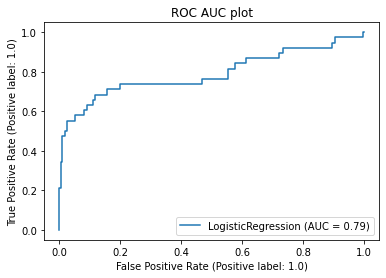

In [138]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LRV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

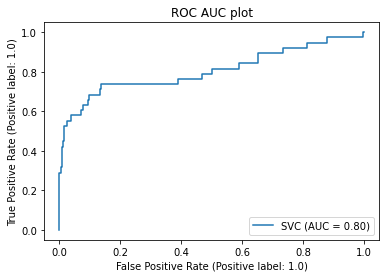

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(VC.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

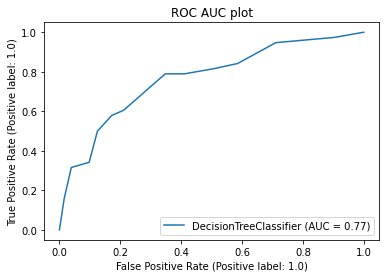

In [78]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator__,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

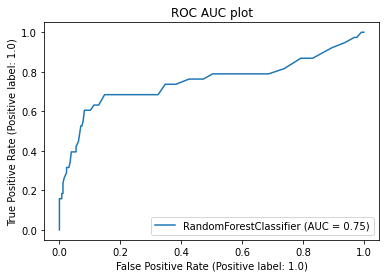

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Through hyper parameter testing the accuracy for the logistric regression model remains the same thus hyper paramater tuning does not affect the model. Final accuracy is 92% and AUC accuracy is 79% using the Logistic Regression Model

In [139]:
import joblib
joblib.dump(LRV.best_estimator_,"HR Attrition.pkl")

['HR Attrition.pkl']

# Thus through this model we will be able to test whether the employee will leave the organisation or not with 92% accuracy, thus this is a very good model which will help the HRs to retain employees as this model will tell which factors are the most responsible and can be made better for employees.